# Predictive Mainatinance - EDA on Machines, Errors, Failures and Maintainance Datasets (3 of 4)

### Environment Setup:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt


### Errors
The second major data source is the error logs. These are non-breaking errors thrown while the machine is still operational and do not constitute as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

### Explanations on the data schema:
- __datetime__:  the day when that row of data was collected for that machine (datetime64)
- __machineID__: machine identifier starting from 1 with increments of +1 (int64)
- __errorID__:   error logs categorised from error1 to error5 (category)

In [39]:
errors = pd.read_csv('data/errors.csv')
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [4]:
errors.tail()

,datetime,machineID,errorID
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3
3918,2015-12-22 03:00:00,100,error3


### Stats on the Errors (errors.csv) Dataset

In [5]:
errors.shape # print the dataframe (num rows, num cols)

(3919, 3)

In [6]:
errors.info() # print information on this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
datetime     3919 non-null datetime64[ns]
machineID    3919 non-null int64
errorID      3919 non-null category
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 65.3 KB


In [7]:
errors.describe() # print some basic statistical details on this dataframe

,machineID
count,3919.000000
mean,51.044654
std,28.954988
min,1.000000
25%,25.000000
50%,51.000000
75%,77.000000
max,100.000000


The machineID column was examined in the previous notebook

### Perfom A Categorical Error Count

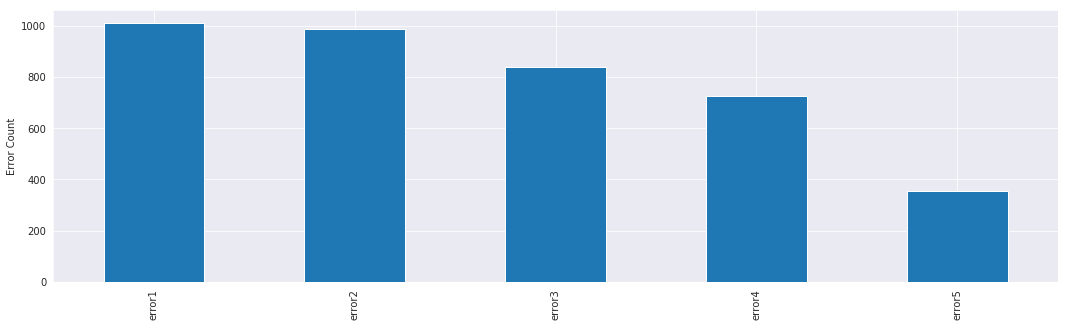

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(18, 5))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Error Count')
plt.show()

### Inspect Columns With Missing Values

In [11]:
pd.DataFrame({'total_missing': errors.isnull().sum(), 'perc_missing': (errors.isnull().sum()/errors.shape[0])*100})

,total_missing,perc_missing
datetime,0,0.0
machineID,0,0.0
errorID,0,0.0


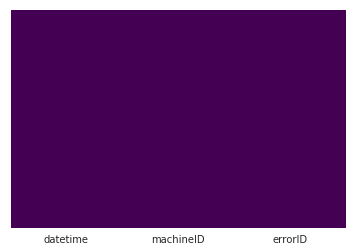

In [37]:
sns.heatmap(errors.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

The heatmap shows that there are no missing values. The missing values would have otherwise been represented by a diffrent color (shade of purple).

### Machines

This data set includes some information about the machines: model type and age (years in service).

### Explanations on the data schema:
- machineID: machine identifier starting from 1 with increments of +1 (int64)
- model:     machine model type categorised from model1 to model5 (category)
- age:       the age of a machine measured as number of years since instalation (int64)

In [40]:
machines = pd.read_csv('data/machines.csv')
machines['model'] = machines['model'].astype('category')
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [41]:
machines.tail()

,machineID,model,age
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14
99,100,model4,5


In [42]:
machines.shape # print the dataframe (num rows, num cols)

(100, 3)

In [121]:
machines.info() # print information on this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
machineID    100 non-null int64
model        100 non-null category
age          100 non-null int64
dtypes: category(1), int64(2)
memory usage: 1.9 KB


In [122]:
machines.describe() # print some basic statistical details on this dataframe

,machineID,age
count,100.000000,100.000000
mean,50.500000,11.330000
std,29.011492,5.856974
min,1.000000,0.000000
25%,25.750000,6.750000
50%,50.500000,12.000000
75%,75.250000,16.000000
max,100.000000,20.000000


### Inspect Columns With Missing Values

In [123]:
pd.DataFrame({'total_missing': machines.isnull().sum(), 'perc_missing': (machines.isnull().sum()/machines.shape[0])*100})

,total_missing,perc_missing
machineID,0,0.0
model,0,0.0
age,0,0.0


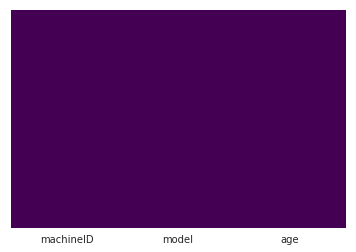

In [124]:
sns.heatmap(machines.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

The heatmap shows that there are no missing values. The missing values would have otherwise been represented by a diffrent color (shade of purple).

### Machine Model Count Distribution

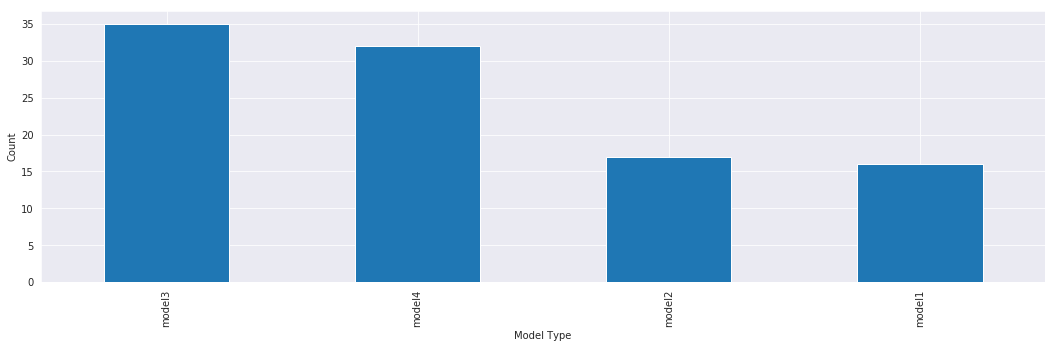

In [128]:
sns.set_style("darkgrid")
plt.figure(figsize=(18, 5))
machines['model'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Model Type')
plt.show()

### Machine Age Distribution

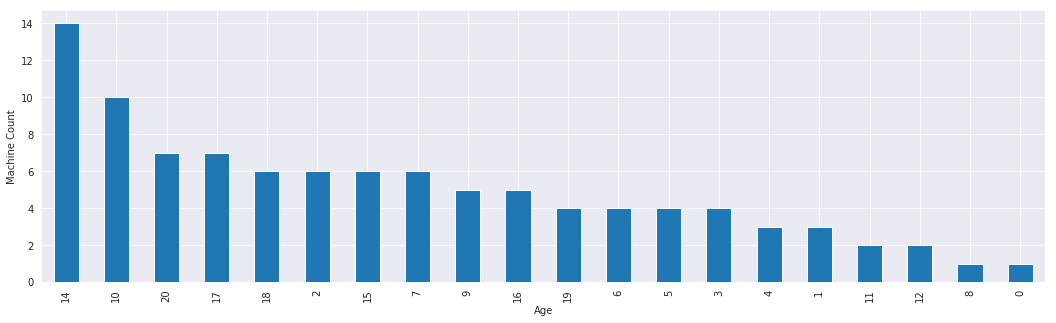

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(18, 5))
machines['age'].value_counts().plot(kind='bar')
plt.ylabel('Machine Count')
plt.xlabel('Age')
plt.show()

### Age Distribution by Machine Model 

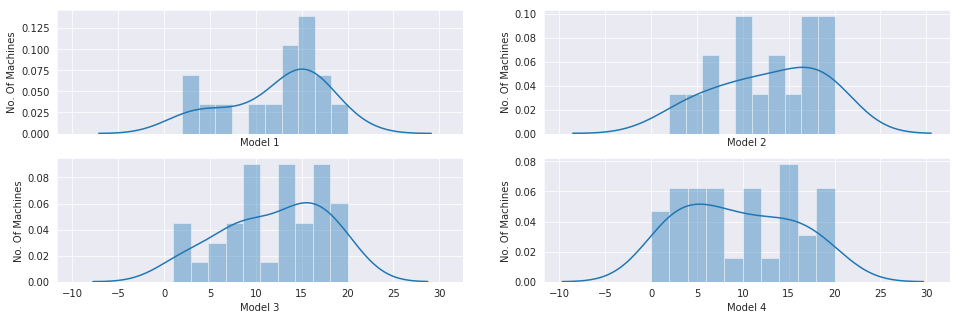

In [101]:
_, axes = plt.subplots(2, 2, figsize=(16, 5), sharex=True)

sns.distplot(machines.loc[(machines['model'] == 'model1'), ['age']], kde = True, ax=axes[0, 0], bins=10,)
axes[0, 0].set(xlabel='Model 1', ylabel='No. Of Machines')

sns.distplot(machines.loc[(machines['model'] == 'model2'), ['age']], kde = True, ax=axes[0, 1], bins=10,)
axes[0, 1].set(xlabel='Model 2', ylabel='No. Of Machines')

sns.distplot(machines.loc[(machines['model'] == 'model3'), ['age']], kde = True, ax=axes[1, 0], bins=10,)
axes[1, 0].set(xlabel='Model 3', ylabel='No. Of Machines')

sns.distplot(machines.loc[(machines['model'] == 'model4'), ['age']], kde = True, ax=axes[1, 1], bins=10,)
axes[1, 1].set(xlabel='Model 4', ylabel='No. Of Machines')

plt.show()

### Failures

These are the records of component replacements due to failures. Each record has a date and time, machine ID, and failed component type.

### Explanations on the data schema:
- datetime:  the day when that row of data was collected for that machine (datetime64)
- machineID: machine identifier starting from 1 with increments of +1 (int64)
- failure:   machine component failure type categorised from comp1 to comp4 (category)

In [102]:
failures = pd.read_csv('data/failures.csv')
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [103]:
failures.tail()

,datetime,machineID,failure
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1
760,2015-12-09 06:00:00,100,comp2


In [104]:
failures.shape # print the dataframe (num rows, num cols)

(761, 3)

In [105]:
failures.info() # print information on this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
datetime     761 non-null datetime64[ns]
machineID    761 non-null int64
failure      761 non-null category
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 12.9 KB


In [106]:
failures.describe() # print some basic statistical details on this dataframe

,machineID
count,761.000000
mean,51.911958
std,29.515542
min,1.000000
25%,24.000000
50%,51.000000
75%,79.000000
max,100.000000


### Inspect Columns With Missing Values

In [107]:
pd.DataFrame({'total_missing': failures.isnull().sum(), 'perc_missing': (failures.isnull().sum()/failures.shape[0])*100})

,total_missing,perc_missing
datetime,0,0.0
machineID,0,0.0
failure,0,0.0


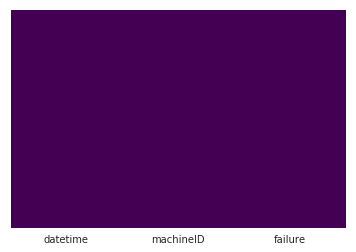

In [108]:
sns.heatmap(failures.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

The heatmap shows that there are no missing values. The missing values would have otherwise been represented by a diffrent color (shade of purple).

### Perfom A Categorical Failure Count

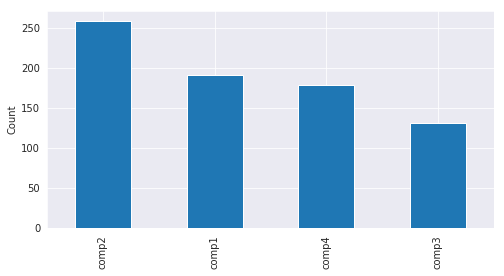

In [110]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

### Maintenance

These are the scheduled and unscheduled maintenance records which correspond to both regular inspection of components as well as failures. A record is generated if a component is replaced during the scheduled inspection or replaced due to a breakdown. The records that are created due to breakdowns will be called failures which is explained in the later sections. Maintenance data has both 2014 and 2015 records.


### Explanations on the data schema:
- datetime:  the day when that the component was replaced for the machine with corresponding machineID (datetime64)
- machineID: machine identifier starting from 1 with increments of +1 (int64)
- comp:   machine component that was replaces type categorised from comp1 to comp4 (category)

In [111]:
maintainance = pd.read_csv('data/maint.csv')
maintainance['datetime'] = pd.to_datetime(maintainance['datetime'], format="%Y-%m-%d %H:%M:%S")
maintainance['comp'] = maintainance['comp'].astype('category')
maintainance.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [112]:
maintainance.tail()

,datetime,machineID,comp
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2
3285,2015-12-24 06:00:00,100,comp2


In [113]:
maintainance.shape # print the dataframe (num rows, num cols)

(3286, 3)

In [115]:
maintainance.info() # print information on this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
datetime     3286 non-null datetime64[ns]
machineID    3286 non-null int64
comp         3286 non-null category
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 54.8 KB


In [116]:
maintainance.describe() # print some basic statistical details on this dataframe

,machineID
count,3286.000000
mean,50.284236
std,28.914478
min,1.000000
25%,25.250000
50%,50.000000
75%,75.000000
max,100.000000


### Inspect Columns With Missing Values

In [117]:
pd.DataFrame({'total_missing': maintainance.isnull().sum(), 'perc_missing': (maintainance.isnull().sum()/maintainance.shape[0])*100})

,total_missing,perc_missing
datetime,0,0.0
machineID,0,0.0
comp,0,0.0


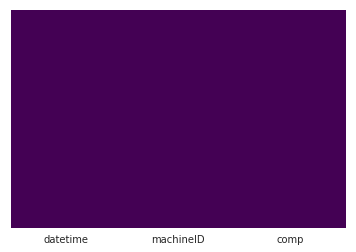

In [118]:
sns.heatmap(maintainance.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

The heatmap shows that there are no missing values. The missing values would have otherwise been represented by a diffrent color (shade of purple).

### Perfom A Categorical Maintainance Count

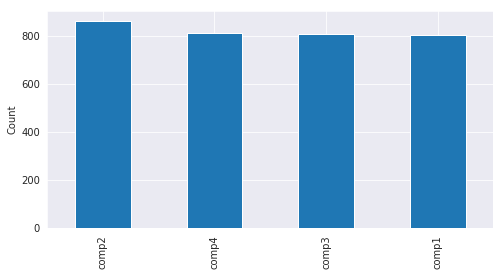

In [120]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maintainance['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()